<a href="https://colab.research.google.com/github/emanuel379/Analise-de-Sobrevivencia-e-Confiabilidade/blob/main/Exerc%C3%ADcio_3_Mini_avalia%C3%A7%C3%A3o_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘BH’, ‘checkmate’, ‘foreach’, ‘iterators’, ‘RcppArmadillo’, ‘orthopolynom’, ‘rbibutils’, ‘fields’, ‘mapproj’, ‘maps’, ‘MBA’, ‘DEoptim’, ‘BBmisc’, ‘GA’, ‘gaussquad’, ‘Rdpack’, ‘autoimage’


Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer

[1] "Estimador de Kaplan-Meier - Grupo 1:"
Call: survfit(formula = Surv(temp, cens) ~ 1, data = data1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6     21       3    0.857  0.0764        0.720        1.000
    7     17       1    0.807  0.0869        0.653        0.996
   10     15       1    0.753  0.0963        0.586        0.968
   13     12       1    0.690  0.1068        0.510        0.935
   16     11       1    0.627  0.1141        0.439        0.896
   22      7       1    0.538  0.1282        0.337        0.858
   23      6       1    0.448  0.1346        0.249        0.807
[1] "Estimador de Kaplan-Meier - Grupo 2:"
Call: survfit(formula = Surv(temp, cens) ~ 1, data = data2)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     21       2   0.9048  0.0641      0.78754        1.000
    2     19       2   0.8095  0.0857      0.65785        0.996
    3     17       1   0.7619  0.0929      0.59988        0.968
    4     16       2   0

Warning message:
“Now, to change color palette, use the argument palette= 'blue' instead of color = 'blue'”


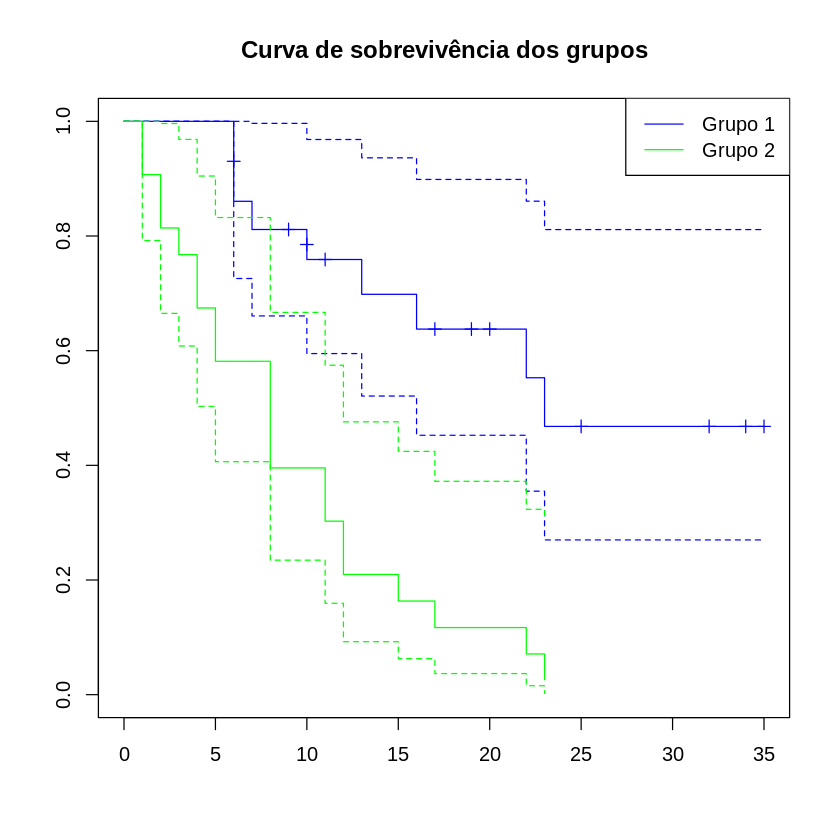

Warning message:
“Now, to change color palette, use the argument palette= 'green' instead of color = 'green'”


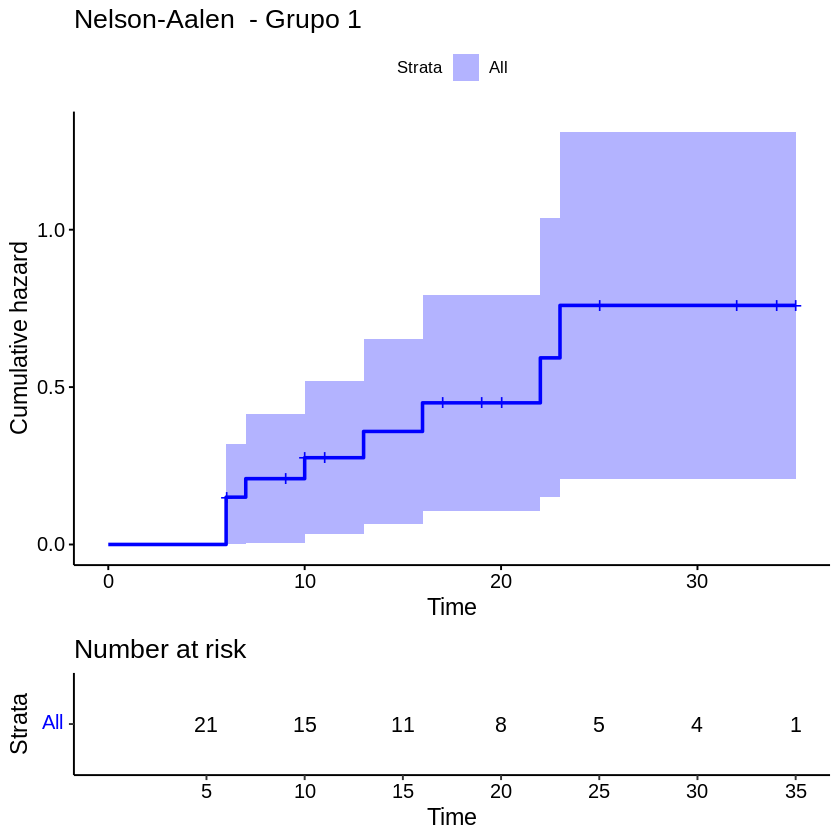

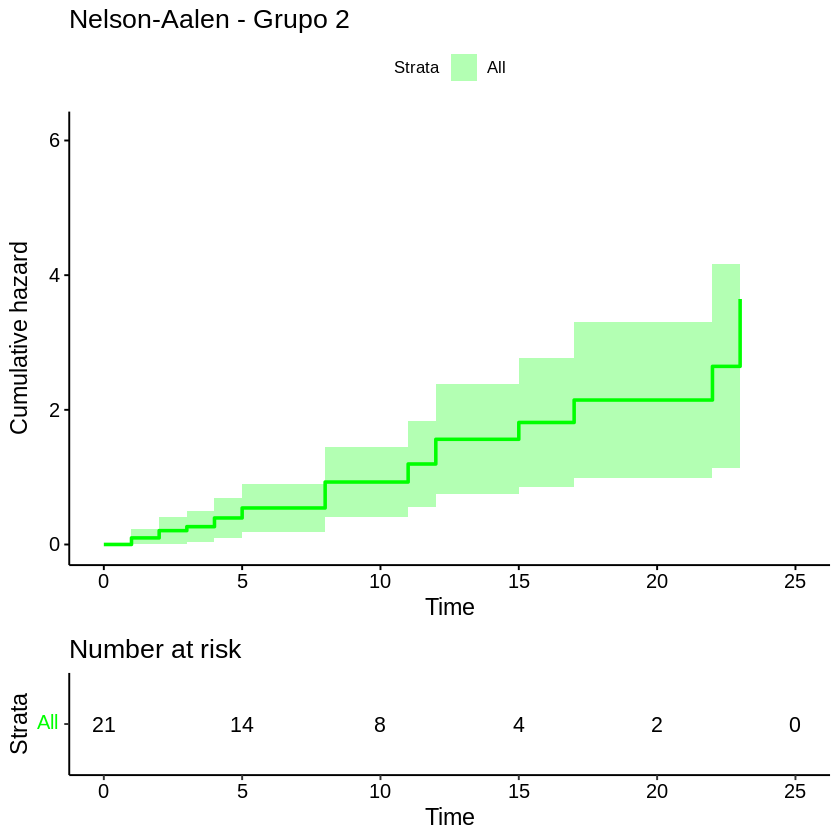

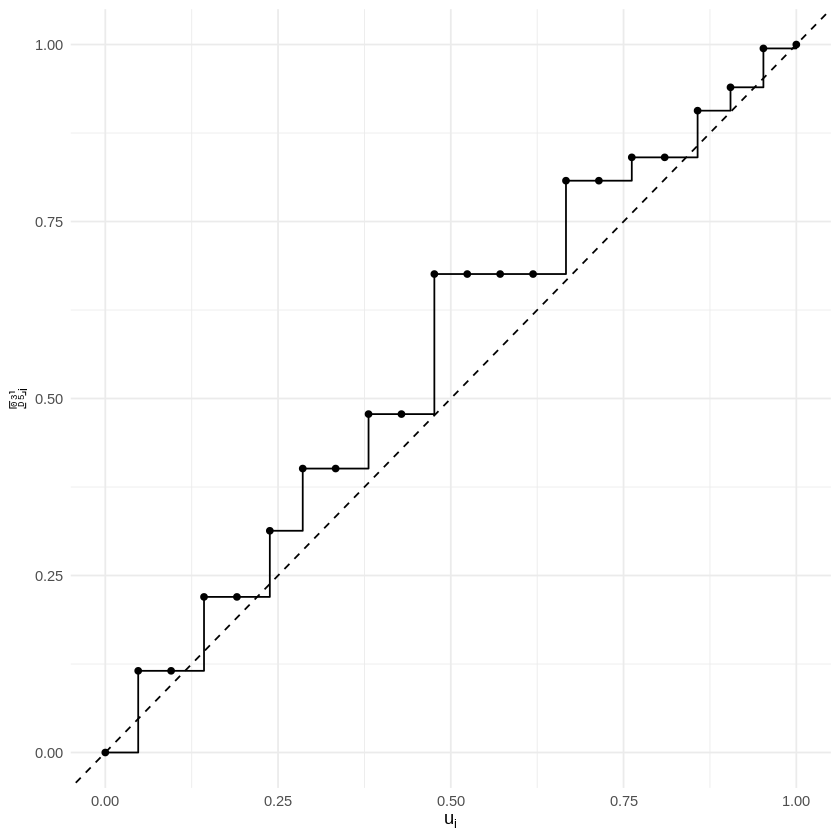

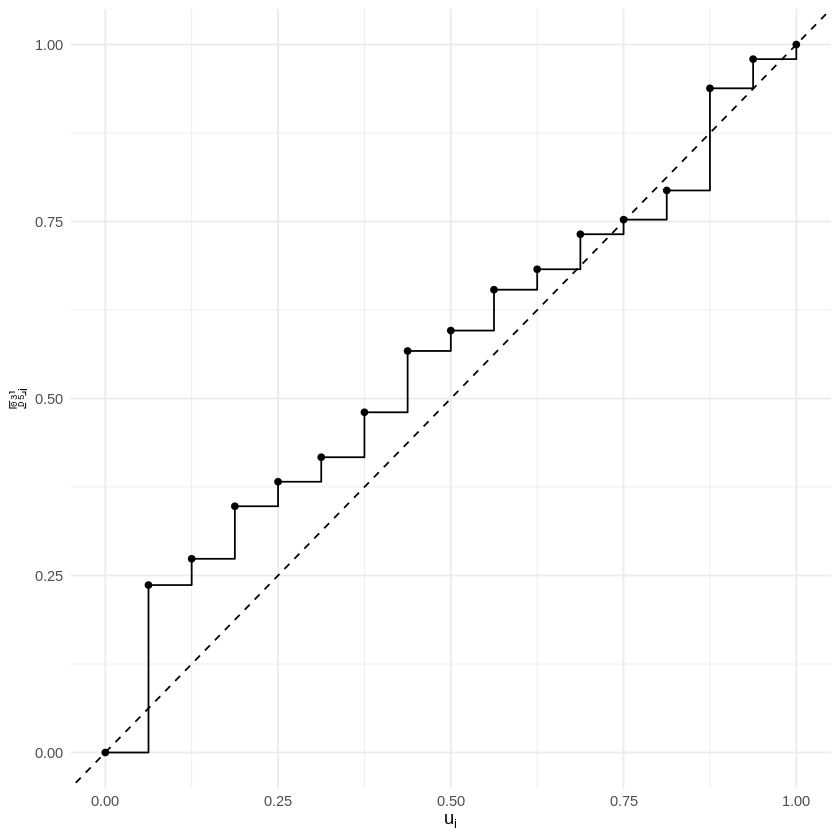

In [ ]:
install.packages("survminer")
install.packages("tidyverse")
install.packages("EstimationTools")

# Exercício 3: Considere os dados de sobrevivência abaixo (em semanas) para 2
# tratamentos. 6MP (novo tratamento) e placebo (controle). Os dados do grupo
# controle foram completos e os dados do grupo tratamentos foram censurados
# progressivamente.

# Bibliotecas necessárias
library(survival)
library(survminer) # Carregando a biblioteca survminer para a função ggsurvplot
library(ggplot2)
library(tidyverse)
library(EstimationTools)

# Dados para o grupo 1
data1 <- data.frame(
  temp = c(6,6,6,6,7,9,10,10,11,13,16,17,19,20,22,23,25,32,32,34,35),
  cens = c(1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0)
)

# Dados para o grupo 2
data2 <- data.frame(
  temp = c(1,1,2,2,3,4,4,5,5,8,8,8,8,11,11,12,12,15,17,22,23),
  cens = c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
)

# a) Encontrar os estimadores produto limite, Kaplan-Meier e Nelson Alaen para
# os dois grupos.

# Ajustando um estimador de Kaplan-Meier para cada grupo
fit1_km <- survfit(Surv(temp, cens) ~ 1, data = data1)
fit2_km <- survfit(Surv(temp, cens) ~ 1, data = data2)

# Ajustando o modelo de riscos proporcionais de Cox
cox_model1 <- coxph(Surv(temp, cens) ~ 1, data = data1)
cox_model2 <- coxph(Surv(temp, cens) ~ 1, data = data2)

# Obtendo a estimativa dos riscos acumulados a partir do modelo de Cox(Nelson Aalen)
fit1_na <- survfit(cox_model1)
fit2_na <- survfit(cox_model2)

# Printando o sumário do estimador de Kaplan-Meier para os grupos
print("Estimador de Kaplan-Meier - Grupo 1:")
print(summary(fit1_km))
print("Estimador de Kaplan-Meier - Grupo 2:")
print(summary(fit2_km))

#  Printando o sumário do estimador de Nelson-Aalen
print("Estimador de Nelson-Aalen - Grupo 1:")
print(summary(fit1_na))
print("Estimador de Nelson-Aalen - Grupo 2:")
print(summary(fit2_na))

# b) Encontrar as variâncias dos estimadores de Kaplan-Meier e intervalos de confiança.

# Função para as variâncias e intervalos de confiança para o Kaplan-Meier
compute_var_ci <- function(group_data) {
  km_fit <- survfit(Surv(temp, cens) ~ 1, data = group_data)
  variance <- sum(km_fit$std.err^2)  # Variância do estimador de Kaplan-Meier
  ci_low <- km_fit$lower  # Limite inferior do IC
  ci_high <- km_fit$upper  # Limite superior do IC
  return(list(variance = variance, ci_low = ci_low, ci_high = ci_high))
}

# Computando os resultados do IC e variância por grupo
result_group1 <- compute_var_ci(data1)
result_group2 <- compute_var_ci(data2)

# Printando os resultados
print("Grupo 1:")
print(paste("Variância:", result_group1$variance))
print(paste("Limite inferior do IC:", result_group1$ci_low))
print(paste("Limite superior do IC:", result_group1$ci_high))

print("Grupo 2:")
print(paste("Variância:", result_group2$variance))
print(paste("Limite inferior do IC:", result_group2$ci_low))
print(paste("Limite superior do IC:", result_group2$ci_high))

# c) Faça o gráfico das curvas de sobrevivência estimadas.

# Plotando as curvas de sobrevivência para o grupo 1 com indicador de censura
plot(survfit(cox_model1), main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE)

# Adicionando a curva do grupo 2
lines(survfit(cox_model2), col = "green")

# Adicionando legenda
legend("topright", legend = c("Grupo 1", "Grupo 2"), col = c("blue", "green"), lty = 1)

# d) Calcule o tempo médio de vida dos pacientes para os dois grupos.

# Calculando o tempo médio de vida para os grupos(desconsiderando a censura)
average_lifespan_group1 <- mean(data1$temp[data1$cens == 1])
average_lifespan_group2 <- mean(data2$temp[data2$cens == 1])

# Levando em Considerações a censura para o grupo 1
average_lifespan_grupo1_cc <- mean(data1$temp)

# Printando os resultados
print(paste("Tempo médio de vida - Grupo 1:", average_lifespan_group1))
print(paste("Tempo médio de vida com censura- Grupo 1:", average_lifespan_grupo1_cc))
print(paste("Tempo médio de vida - Grupo 2:", average_lifespan_group2))

# e) Com apoio computacional obtenha todos os estimadores e faça os gráficos.

# A partir dos itens anteriores, foi possível observar os resultados obtidos para
# os estimadores de Kaplan-Meier e Nelson-Aalen dos dois grupos, bem como seus
# intervalos de confiança e curvas de sobrevivência, vamos agora observar as curvas
# para o risco acumulado:

# Plotando as curvas de Nelson Aalen
ggsurvplot(fit1_na, data = data1, risk.table = TRUE, fun = "cumhaz", color = "blue", title = "Nelson-Aalen  - Grupo 1")
ggsurvplot(fit2_na, data = data2, risk.table = TRUE, fun = "cumhaz", color = "green", title = "Nelson-Aalen - Grupo 2")


# f) Faça uma conclusão para os resultados encontrados.

# A partir dos resultados obtidos, temos que, na maior parte do tempo, as curvas de
# sobrevivência e seus respectivos intervalos de confiança apontam para comportamentos
# distintos entre os grupos, uma vez que não há intersecção entre eles,
# apontando para uma sobrevivência maior para o grupo tratado com a nova droga,
# quando comparado com o grupo tratado com placebo. Já para o risco, observamos
# que este cresce muito mais aceleradamente nos indivíduos sem tratamento(grupo
# controle), quando comparados àqueles tratados com 6MP.

# g) Construa o gráfico TTT plot considerando os grupos droga e placebo. Em
# relação à função de risco associada a cada um desses grupos, o que podemos concluir?

t1 = c(6,6,6,6,7,9,10,10,11,13,16,17,19,20,22,23,25,32,32,34,35)
cens = c(1,1,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0)

t2 = c(1,1,2,2,3,4,4,5,5,8,8,8,8,11,11,12,12,15,17,22,23)

# =====
# TTT PLOT PARA DADOS NÃO-CENSURADOS
# =====

TTT = TTTE_Analytical(t2~1, method='Barlow')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

G =
  dadosTTT %>%
  ggplot(aes(x=x, y=y)) +
  geom_step() +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  lims(y=c(0,1), x=c(0,1)) +
  labs(x = bquote(u[i]), y = bquote(varphi[i])) +
  theme_minimal(); G


# =====
# TTT PLOT PARA DADOS CENSURADOS
# =====

TTT = TTTE_Analytical(Surv(t1,cens)~1, method='censored')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

G =
  dadosTTT %>%
  ggplot(aes(x=x, y=y)) +
  geom_step() +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  lims(y=c(0,1), x=c(0,1)) +
  labs(x = bquote(u[i]), y = bquote(varphi[i])) +
  theme_minimal(); G

# A partir da análise gráfica, é possível observar que, tanto para o grupo 2, quanto
# para o grupo 1, temos que suas curvas de risco se situam pouco acima da curva
# tracejada(de risco constante), o que nos permite afirmar que os riscos apresentam
# um comportamento crescente para ambos os grupos, porém, a julgar pela proximidade
# entre a curva de risco constante e as observadas, podemos julgar que este crescimento
# é mais lento que o exponencial, provavelmente se tratando de riscos lineares.